In [1]:
# %load withholding.py
%matplotlib notebook
import matplotlib as plt
import numpy as np
import pandas as pd

df = pd.read_csv("../../data/withholding.tsv", sep="\t")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

def parse_array(s):
    try:
        return np.fromstring(s, dtype=float, sep="|")
    except:
        return np.array([float('nan')])

def expand(row):
    compute = parse_array(row.compute)
    rcompute = compute / np.sum(compute)
    activations = parse_array(row.activations)
    assert(np.sum(activations) == row.number_activations or row.error)
    ractivations = activations / row.number_activations
    reward = parse_array(row.reward)
    rreward = reward / np.sum(reward)
    d = {}
    d['attacker_compute'] = rcompute[0]
    d['attacker_relative_activations'] = ractivations[0]
    d['attacker_relative_reward'] = rreward[0]
    d['attacker_gain'] = rreward[0] - ractivations[0]
    d['attacker_efficiency'] = rreward[0] / ractivations[0]
    return d

df=df.join(df.apply(expand, axis=1, result_type='expand'))

In [2]:
d = df[df.protocol == "george"]
d = d[(d.incentive_scheme == 'constant') | (d.incentive_scheme == 'discount')]
d.columns

Index(['network', 'network_description', 'compute', 'protocol', 'k',
       'protocol_description', 'block_interval', 'activation_delay',
       'number_activations', 'activations', 'incentive_scheme',
       'incentive_scheme_description', 'strategy', 'strategy_description',
       'reward', 'machine_duration_s', 'error', 'attacker_compute',
       'attacker_relative_activations', 'attacker_relative_reward',
       'attacker_gain', 'attacker_efficiency'],
      dtype='object')

In [3]:
d.pivot(index=['attacker_compute', 'k'], columns=['strategy', 'incentive_scheme'], values='attacker_efficiency')

strategy             private-override-catchup            \
incentive_scheme                     constant  discount   
attacker_compute k                                        
0.10             1                   0.352348  0.352348   
                 2                   0.062218  0.062218   
                 4                   0.000000  0.000000   
                 8                   0.000000  0.000000   
                 16                  0.000000  0.000000   
                 32                  0.000000  0.000000   
                 64                  0.000000  0.000000   
                 128                 0.000000  0.000000   
0.20             1                   0.619738  0.619738   
                 2                   0.252806  0.252806   
                 4                   0.126010  0.121728   
                 8                   0.011881  0.011726   
                 16                  0.000000  0.000000   
                 32                  0.000000  0.000000   
                 64                  0.000000  0.000000   
                 128                 0.000000  0.000000   
0.25             1                   0.770996  0.770996   
                 2                   0.408275  0.408275   
                 4                   0.217326  0.209079   
                 8                   0.070747  0.066676   
                 16                  0.000000  0.000000   
                 32                  0.000000  0.000000   
                 64                  0.000000  0.000000   
                 128                 0.000000  0.000000   
0.33             1                   1.009049  1.009049   
                 2                   0.687478  0.687478   
                 4                   0.442859  0.432432   
                 8                   0.323810  0.312219   
                 16                  0.182477  0.171836   
                 32                  0.039005  0.035966   
                 64                  0.000000  0.000000   
                 128                 0.000000  0.000000   
0.40             1                   1.173303  1.173303   
                 2                   0.931144  0.931144   
                 4                   0.741043  0.730043   
                 8                   0.645588  0.627896   
                 16                  0.658025  0.636389   
                 32                  0.611917  0.596638   
                 64                  0.251866  0.236704   
                 128                 0.141706  0.134132   
0.45             1                   1.459628  1.459628   
                 2                   1.134302  1.134302   
                 4                   0.993568  0.984836   
                 8                   1.006268  0.996786   
                 16                  1.015333  1.012735   
                 32                  1.025596  1.028028   
                 64                  1.377041  1.457347   
                 128                 1.291027  1.352316   
0.50             1                   1.753903  1.753903   
                 2                   1.775749  1.775749   
                 4                   1.708014  1.711303   
                 8                   1.219162  1.226020   
                 16                  1.429481  1.468965   
                 32                  1.503590  1.567016   
                 64                  1.511838  1.630255   
                 128                 1.483045  1.631881   

strategy             private-override-block-alt            \
incentive_scheme                       constant  discount   
attacker_compute k                                          
0.10             1                     0.322748  0.322748   
                 2                     0.244190  0.244190   
                 4                     0.138349  0.133138   
                 8                     0.114739  0.106244   
                 16                    0.093976  0.088261   
                 32           

<IPython.core.display.Javascript object>


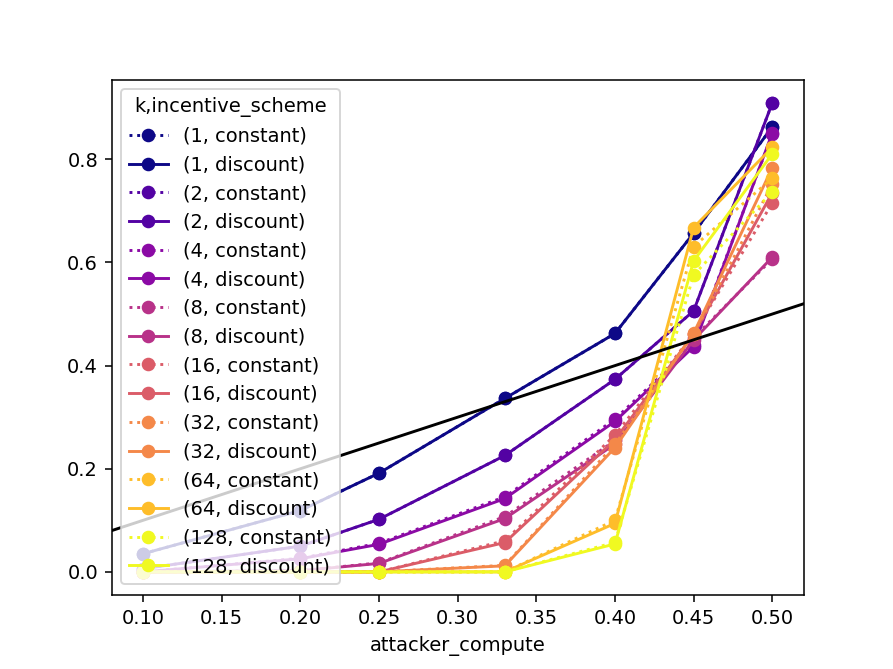

In [6]:
# compare same strategy for incentive schemes
dd = d[d.strategy == 'private-override-catchup']
dd = dd.pivot(index=['attacker_compute'], columns=['k', 'incentive_scheme'], values='attacker_relative_reward')
dd = dd[sorted(dd.columns)]
line_style = [ 'o-' if proto == 'discount' else 'o:' for (k, proto) in  dd.columns]
k = np.unique([ k for (k, proto) in dd.columns])
cmap = plt.cm.get_cmap('plasma', len(k))
colormap = { k: cmap(i) for (i, k) in enumerate(k) }
line_colors = [ colormap[k] for (k, proto) in dd.columns ]
line_colors
p = dd.plot(style=line_style, color=line_colors)
p.axline([.1, .1], [.5, .5], color='black')

<IPython.core.display.Javascript object>


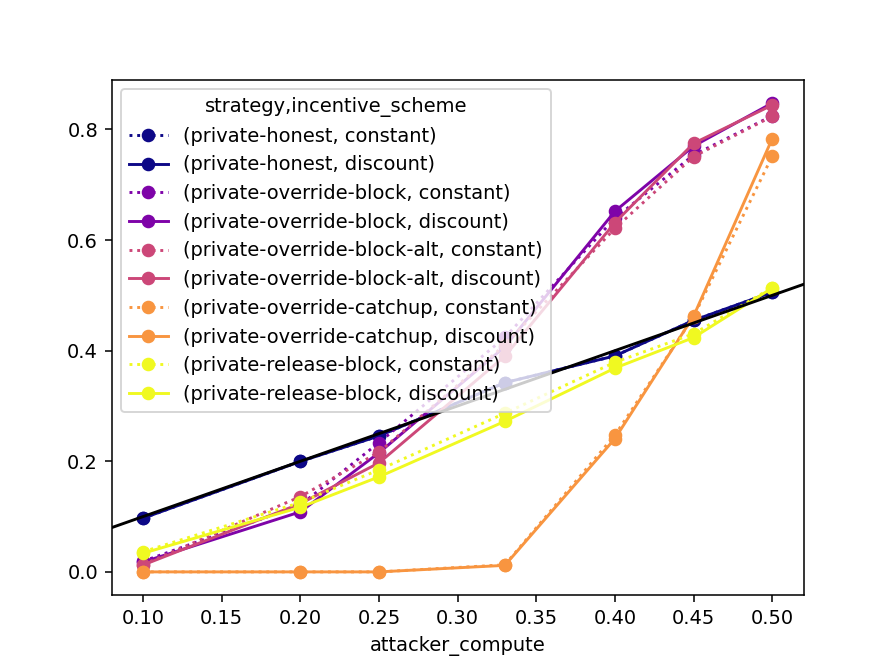

In [15]:
# compare same strategies for incentive scheme
dd = d
dd = dd[dd.k == 32]
dd = dd.pivot(index=['attacker_compute'], columns=['strategy', 'incentive_scheme'], values='attacker_relative_reward')
dd = dd[sorted(dd.columns)]
line_style = [ 'o-' if proto == 'discount' else 'o:' for (k, proto) in  dd.columns]
k = np.unique([ k for (k, proto) in dd.columns])
cmap = plt.cm.get_cmap('plasma', len(k))
colormap = { k: cmap(i) for (i, k) in enumerate(k) }
line_colors = [ colormap[k] for (k, proto) in dd.columns ]
line_colors
p = dd.plot(style=line_style, color=line_colors)
p.axline([.1, .1], [.5, .5], color='black')

<IPython.core.display.Javascript object>


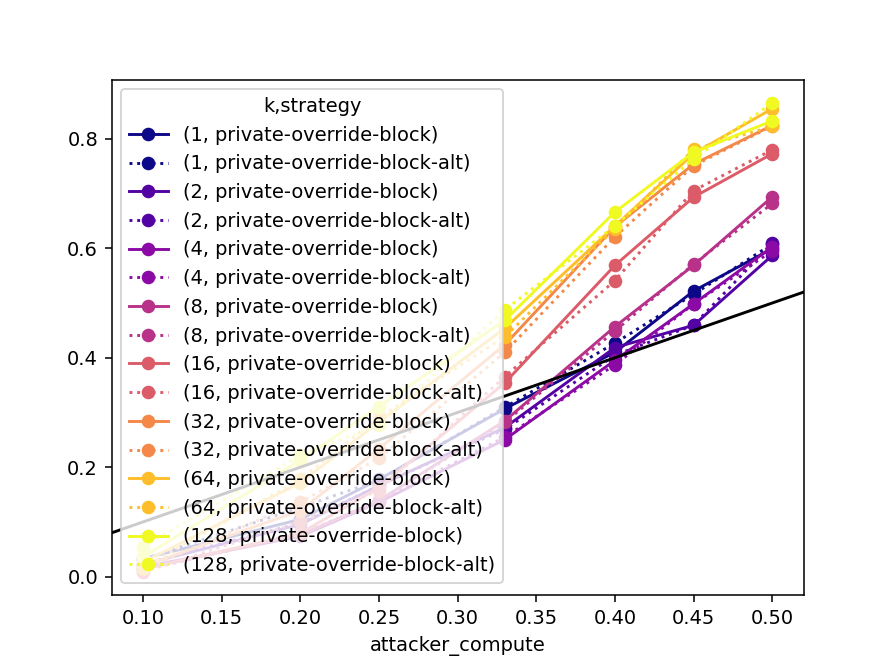

In [9]:
# does numerical implementation line up with non-numerical implementation of policiy?
dd = d
dd = dd[dd['protocol']=='george']
dd = dd[(dd['strategy']=='private-override-block') | (dd['strategy']=='private-override-block-alt')]
dd = dd[dd['incentive_scheme']=='constant']
dd = dd.pivot(index=['attacker_compute'], columns=['k', 'strategy'], values='attacker_relative_reward')
dd = dd[sorted(dd.columns)]
line_style = [ 'o-' if proto == 'private-override-block' else 'o:' for (k, proto) in  dd.columns]
k = np.unique([ k for (k, proto) in dd.columns])
cmap = plt.cm.get_cmap('plasma', len(k))
colormap = { k: cmap(i) for (i, k) in enumerate(k) }
line_colors = [ colormap[k] for (k, proto) in dd.columns ]
line_colors
p = dd.plot(style=line_style, color=line_colors)
p.axline([.1, .1], [.5, .5], color='black')
# It does line up!